<a href="https://colab.research.google.com/github/AxekA13/SSD-for-VisDrone/blob/master/DL_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [175]:
import torch
import torchvision
import os
from PIL import Image
import numpy as np
import pandas as pd


def annotations_parser(path_to_folder):
  bbox = []
  bbox_and_class = []
  files = os.listdir(directory)
  files.sort()
  for file in files:
    filename = path_to_folder + file
    temp = []
    with open(filename) as f:
      lines = f.readlines()
      lines = [x.strip() for x in lines]
      lines = [x.split(',') for x in lines]
      for x in lines:
        if x[5] in ['1','2','3','4','5','6','9']:
          bbox = x[:4]
          bbox[2] = int(bbox[0]) + int(bbox[2])
          bbox[3] = int(bbox[1]) - int(bbox[3]) if int(bbox[1]) - int(bbox[3]) > 0 else 0
          bbox.append(x[5])
          temp.append([int(i) for i in bbox])
    bbox_and_class.append(temp)
  return bbox_and_class

directory = './dataset'
files = os.listdir(directory)
orig_sizes = []
for file in files:
  filename = "/content/dataset/" + file
  im = Image.open(filename)
  print(im.size)
  orig_sizes.append([im.size[0],im.size[1]])
  img = im.resize((300,300))
  img.save(filename)




(960, 540)
(960, 540)
(1360, 765)
(1360, 765)
(1360, 765)
(960, 540)
(960, 540)
(1360, 765)
(1360, 765)
(1360, 765)
(960, 540)
(1360, 765)
(1360, 765)
(960, 540)
(1360, 765)
(1360, 765)
(1360, 765)
(1360, 765)
(1360, 765)
(1360, 765)
(1360, 765)
(1920, 1080)
(960, 540)
(960, 540)
(1360, 765)
(960, 540)
(1360, 765)
(960, 540)
(960, 540)
(1360, 765)
(1360, 765)
(1920, 1080)
(960, 540)
(1360, 765)
(1360, 765)
(1360, 765)
(1360, 765)
(1360, 765)
(1360, 765)
(1360, 765)
(1360, 765)
(1360, 765)
(1360, 765)
(1360, 765)
(1360, 765)
(1360, 765)
(1360, 765)
(960, 540)
(1360, 765)
(1360, 765)
(960, 540)
(1360, 765)
(1360, 765)
(1360, 765)
(1360, 765)
(960, 540)
(1360, 765)
(1360, 765)
(1360, 765)
(960, 540)
(1360, 765)
(1360, 765)
(960, 540)
(1360, 765)
(960, 540)
(960, 540)
(1360, 765)
(960, 540)
(960, 540)
(1360, 765)
(960, 540)
(960, 540)
(1360, 765)
(1360, 765)
(1360, 765)
(1360, 765)
(1360, 765)
(1360, 765)
(960, 540)
(1360, 765)
(1360, 765)
(1360, 765)
(960, 540)
(960, 540)
(1360, 765)
(136

In [176]:
print(orig_sizes)
sizes = orig_sizes

[[960, 540], [960, 540], [1360, 765], [1360, 765], [1360, 765], [960, 540], [960, 540], [1360, 765], [1360, 765], [1360, 765], [960, 540], [1360, 765], [1360, 765], [960, 540], [1360, 765], [1360, 765], [1360, 765], [1360, 765], [1360, 765], [1360, 765], [1360, 765], [1920, 1080], [960, 540], [960, 540], [1360, 765], [960, 540], [1360, 765], [960, 540], [960, 540], [1360, 765], [1360, 765], [1920, 1080], [960, 540], [1360, 765], [1360, 765], [1360, 765], [1360, 765], [1360, 765], [1360, 765], [1360, 765], [1360, 765], [1360, 765], [1360, 765], [1360, 765], [1360, 765], [1360, 765], [1360, 765], [960, 540], [1360, 765], [1360, 765], [960, 540], [1360, 765], [1360, 765], [1360, 765], [1360, 765], [960, 540], [1360, 765], [1360, 765], [1360, 765], [960, 540], [1360, 765], [1360, 765], [960, 540], [1360, 765], [960, 540], [960, 540], [1360, 765], [960, 540], [960, 540], [1360, 765], [960, 540], [960, 540], [1360, 765], [1360, 765], [1360, 765], [1360, 765], [1360, 765], [1360, 765], [960, 

In [0]:
directory = './annotations/'
bbox_and_classes = annotations_parser(directory)

Маппинг классов

VisDrone_________COCO

1(pedestrian) = 1(person)

2(people) = 1(person)

3(bicycle) = 2(bicycle)

4(car) = 3(car)

5(van) = 8(truck)

6(truck) = 8(truck)

9(bus) = 6(bus)


In [178]:
# Загрузка модели
precision = 'fp32'
ssd_model = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_ssd', model_math=precision)

# Подготовка модели к работе, подгружаем на GPU
utils = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_ssd_processing_utils')
ssd_model.to('cuda')
ssd_model.eval()
directory = './dataset/'
files = files[10:20]
inputs = [utils.prepare_input(str(directory + uri)) for uri in files]
tensor = utils.prepare_tensor(inputs, precision == 'fp16')

Using cache found in /root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub
Using cache found in /root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub


In [0]:
with torch.no_grad():
  detections_batch = ssd_model(tensor)

In [0]:
results_per_input = utils.decode_results(detections_batch)
results_per_input = [utils.pick_best(results, 0.10) for results in results_per_input]
classes_to_labels = utils.get_coco_object_dictionary()

In [0]:
from matplotlib import pyplot as plt
import matplotlib.patches as patches

image_boxes = []
sizes = sizes[10:20]
print(len(sizes))
print(len(results_per_input))
for image_idx in (range(len(results_per_input))):
    predict_bboxes_and_classes = []
    fig, ax = plt.subplots(1)
    # Show original, denormalized image...
    image = inputs[image_idx] / 2 + 0.5
    ax.imshow(image)
    # ...with detections
    bboxes, classes, confidences = results_per_input[image_idx]
    for idx in range(len(bboxes)):
        if str(classes[idx]) in ['1','2','3','6','8']:
          left, bot, right, top = bboxes[idx]
          x, y, w, h = [val * 300 for val in [left, bot, right - left, top - bot]]
          predict_bboxes_and_classes.append([left*sizes[image_idx][0],top*sizes[image_idx][1],right*sizes[image_idx][0],bot*sizes[image_idx][1],classes[idx]])
          rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
          ax.add_patch(rect)
        #ax.text(x, y, "{} {:.0f}%".format(classes_to_labels[classes[idx] - 1], confidences[idx]*100), bbox=dict(facecolor='white', alpha=0.5))
    if predict_bboxes_and_classes is not []:
      image_boxes.append(predict_bboxes_and_classes)
plt.show()

In [199]:
print(image_boxes)
print(bbox_and_classes[10:20])

[[[479.7469139099121, 202.90165543556213, 504.39748764038086, 183.56226325035095, 3], [152.72493839263916, 403.7637484073639, 213.1331205368042, 350.46128153800964, 3], [424.0928363800049, 221.56674027442932, 436.8853282928467, 193.3646321296692, 1], [437.9802989959717, 223.79787683486938, 454.98873710632324, 198.72609972953796, 1], [382.43980407714844, 210.34541308879852, 391.99058532714844, 187.17627704143524, 1], [387.7129554748535, 209.21191692352295, 396.9803810119629, 186.67656540870667, 1], [420.1194477081299, 212.01248109340668, 432.9077625274658, 184.12847220897675, 1], [397.9888343811035, 203.4707772731781, 405.8072090148926, 185.1470947265625, 1], [391.7399597167969, 210.71942031383514, 401.3899040222168, 186.92802250385284, 1], [562.4289321899414, 541.4984750747681, 617.3787689208984, 471.30073070526123, 3], [564.668083190918, 538.2933104038239, 615.8564758300781, 471.51570439338684, 8], [239.8711109161377, 260.3682518005371, 304.9907970428467, 222.57575511932373, 3]], [], 

In [0]:
def iou(box1, box2):
  
    # Calculate the (y1, x1, y2, x2) coordinates of the intersection of box1 and box2. Calculate its Area.
    xi1 = max(box1[0], box2[0])
    yi1 = max(box1[1], box2[1])
    xi2 = min(box1[2], box2[2])
    yi2 = min(box1[3], box2[3])
    inter_area = (xi2 - xi1) * (yi2 - yi1)

    # Calculate the Union area by using Formula: Union(A,B) = A + B - Inter(A,B)
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])
    union_area = box1_area + box2_area - inter_area
    
    # compute the IoU
    iou = inter_area / union_area
    
    return iou


In [0]:
#image boxes, bbox_and_classes
def calculate_accuracy(treshold,image_boxes,bbox_and_classes):
  iou_for_images = []
  for image_predict,image_orig in zip(image_boxes,bbox_and_classes):
    false_positive = 0
    unrecognized = 0
    true_positive = 0
    false = []
    for bbox_predict in image_predict:
      for bbox_orig in image_orig:
        res = iou(bbox_orig[:4],bbox_predict[:4])
        print(res)
        if res > treshold:
          if bbox_predict[4] == bbox_orig[4]:
            true_positive += 1
    iou_for_images.append({'Верно определённые': true_positive,'Ложная тревога': len(image_predict)-true_positive,'Пропущенные': len(image_orig) - true_positive})
  return iou_for_images

In [0]:
accuracy = calculate_accuracy(0.9,image_boxes,bbox_and_classes[10:20])

In [187]:
print(accuracy)
print([len(i) for i in image_boxes])
print([len(i) for i in bbox_and_classes[10:20]])

[{'Верно определённые': 0, 'Ложная тревога': 12, 'Пропущенные': 10}, {'Верно определённые': 0, 'Ложная тревога': 0, 'Пропущенные': 4}, {'Верно определённые': 0, 'Ложная тревога': 12, 'Пропущенные': 34}, {'Верно определённые': 0, 'Ложная тревога': 17, 'Пропущенные': 26}, {'Верно определённые': 0, 'Ложная тревога': 1, 'Пропущенные': 14}, {'Верно определённые': 0, 'Ложная тревога': 0, 'Пропущенные': 10}, {'Верно определённые': 7, 'Ложная тревога': 8, 'Пропущенные': 23}, {'Верно определённые': 0, 'Ложная тревога': 5, 'Пропущенные': 22}, {'Верно определённые': 0, 'Ложная тревога': 15, 'Пропущенные': 16}, {'Верно определённые': 1, 'Ложная тревога': 1, 'Пропущенные': 11}]
[12, 0, 12, 17, 1, 0, 15, 5, 15, 2]
[10, 4, 34, 26, 14, 10, 30, 22, 16, 12]


TypeError: ignored

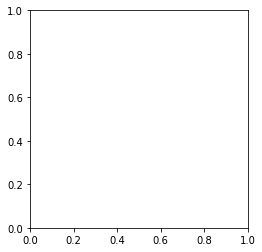

In [193]:
inputs = os.listdir('./orig')
for image in inputs:
    fig, ax = plt.subplots(1)
    # Show original, denormalized image...
    ax.imshow('./orig/' + image)
    for image_orig,image_predict in zip(bbox_and_classes[10:20],image_boxes):
    # ...with detections
      for idx in image_orig:
            x, y, w, h = idx[0],idx[1],idx[2] - idx[0],idx[1] - idx[3] 
            rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='g', facecolor='none')
            ax.add_patch(rect)
      for idx in image_predict:
            x, y, w, h = idx[0],idx[1],idx[2] - idx[0],idx[1] - idx[3] 
            rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
